In [ ]:
import sys
import os
sys.path.append(os.path.abspath('..'))


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_preparation.data_processor import DataProcessor

import xgboost as xgb
from sklearn.metrics import classification_report, f1_score, roc_auc_score

In [40]:
waste_data = pd.read_csv("../synthetic_waste_data.csv")
fetcher = DataProcessor(waste_data)

In [41]:
arrival_regional = fetcher.arriavl_time(by_company= True,company= "RegionalWaste Management" ,agg_arrival=False)
arrival_regional

,arrival,is_Fall,is_Spring,is_Summer,is_Winter,is_weekend,is_holiday,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,hour,day_of_week
arrival_time,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,0.0,5.0
2022-01-01 00:01:00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,0.0,5.0
2022-01-01 00:02:00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,0.0,5.0
2022-01-01 00:03:00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,0.0,5.0
2022-01-01 00:04:00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 23:56:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,12.0,2024.0,365.0,30.0,1.0,23.0,0.0
2024-12-30 23:57:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,12.0,2024.0,365.0,30.0,1.0,23.0,0.0
2024-12-30 23:58:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,12.0,2024.0,365.0,30.0,1.0,23.0,0.0


In [42]:
X = arrival_regional.drop(columns=['arrival'])
y = arrival_regional['arrival']

split_index = int(len(arrival_regional) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


# Create an XGBoost binary classification model
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=400,
    learning_rate=0.08,
    max_depth=5,
    random_state=42,
  
)

model.fit(X_train, y_train)


# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  
y_pred = np.where(y_pred_proba >= 0.6, 1, 0)  # Threshold at 0.6


# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.2f}")

(1419129, 15) (157682, 15)
(1419129,) (157682,)
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    157190
         1.0       0.00      0.00      0.00       492

    accuracy                           1.00    157682
   macro avg       0.50      0.50      0.50    157682
weighted avg       0.99      1.00      1.00    157682

F1-Score: 0.00
AUC-ROC: 0.75


c:\Users\maxik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maxik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maxik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

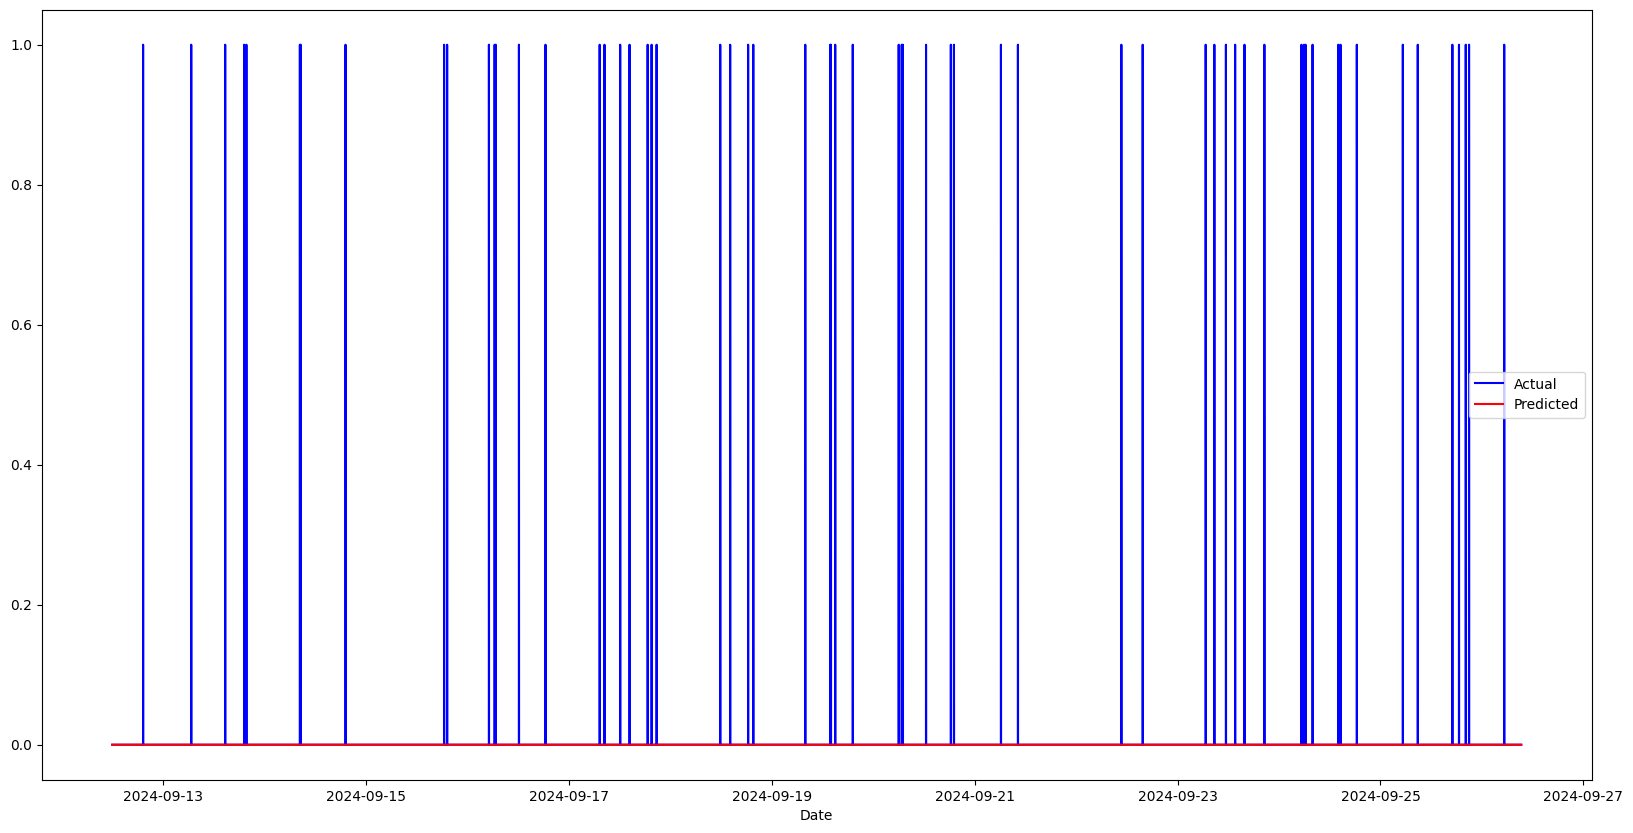

In [43]:
start = 0
end = 20000

plt.figure(figsize=(20, 10))
plt.plot(arrival_regional.index[split_index+start:split_index+end], y_test[start:end], label='Actual', color='blue')
plt.plot(arrival_regional.index[split_index+start:split_index+end], y_pred[start:end], label='Predicted', color='red')
plt.xlabel('Date')

plt.legend()

In [44]:
arrival_regional_3h = fetcher.arriavl_time(by_company= True,company= "RegionalWaste Management" ,agg_arrival=True, agg_value=3)

arrival_regional_3h

,is_Fall,is_Spring,is_Summer,is_Winter,is_weekend,is_holiday,arrival,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,hour,day_of_week
arrival_time,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,0.0,5.0
2022-01-01 03:00:00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,3.0,5.0
2022-01-01 06:00:00,0.0,0.0,0.0,1.0,1.0,0.0,1.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,6.0,5.0
2022-01-01 09:00:00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,9.0,5.0
2022-01-01 12:00:00,0.0,0.0,0.0,1.0,1.0,0.0,1.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 12:00:00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,12.0,2024.0,365.0,30.0,1.0,12.0,0.0
2024-12-30 15:00:00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,12.0,2024.0,365.0,30.0,1.0,15.0,0.0
2024-12-30 18:00:00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,12.0,2024.0,365.0,30.0,1.0,18.0,0.0


In [45]:
X = arrival_regional_3h.drop(columns=['arrival'])
y = arrival_regional_3h['arrival']

split_index = int(len(arrival_regional_3h) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


model.fit(X_train, y_train)


# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  
y_pred = np.where(y_pred_proba >= 0.6, 1, 0)  # Threshold at 0.6


# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.2f}")

(7884, 15) (877, 15)
(7884,) (877,)
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       548
         1.0       0.69      0.53      0.60       329

    accuracy                           0.73       877
   macro avg       0.72      0.69      0.70       877
weighted avg       0.73      0.73      0.72       877

F1-Score: 0.60
AUC-ROC: 0.81


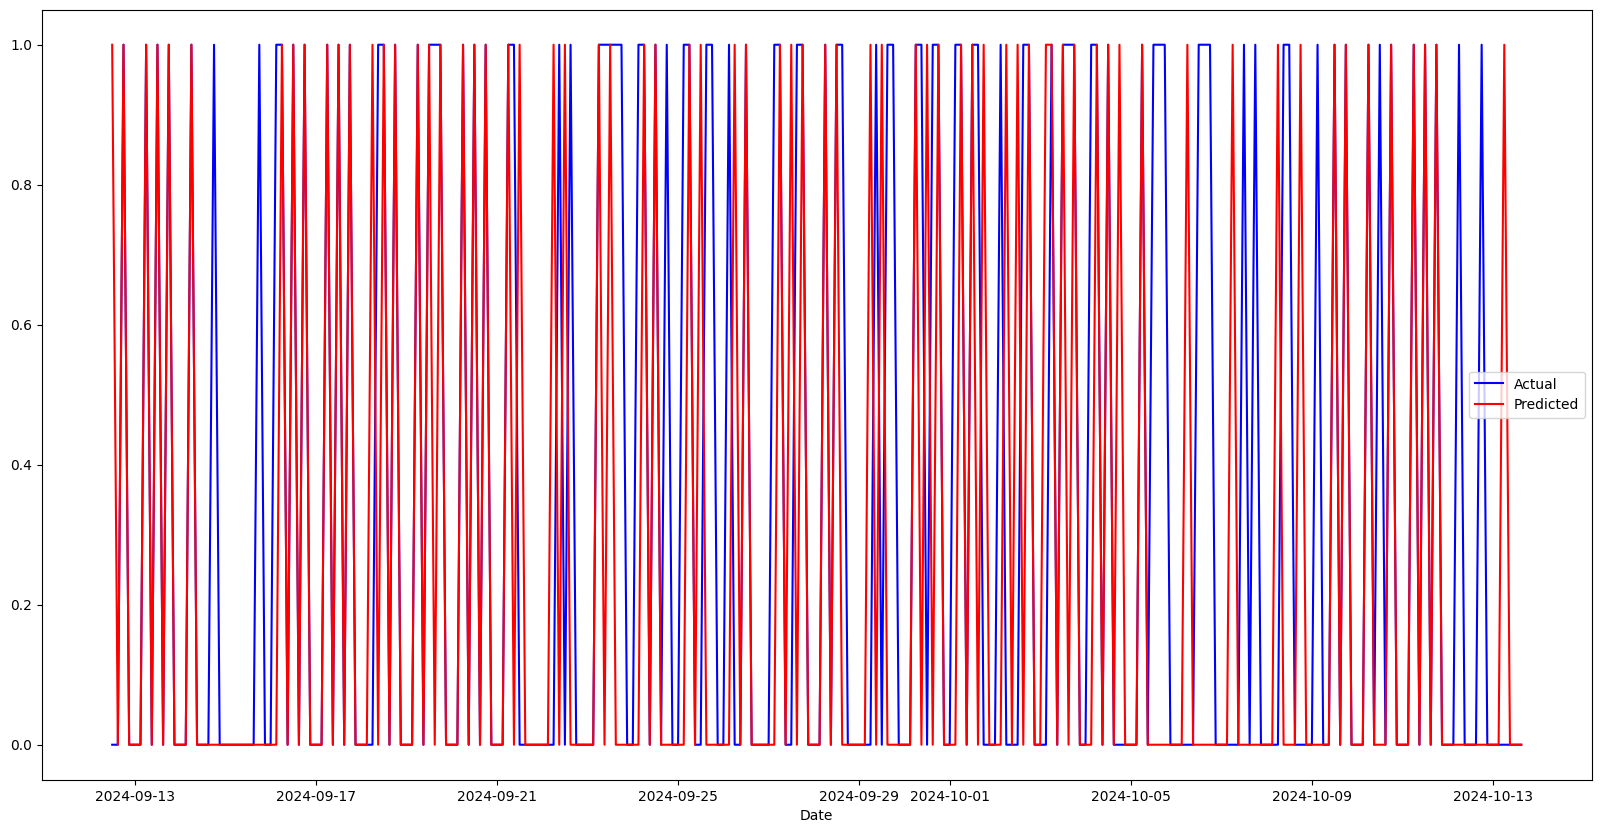

In [46]:
start = 0
end = 250

plt.figure(figsize=(20, 10))
plt.plot(arrival_regional_3h.index[split_index+start:split_index+end], y_test[start:end], label='Actual', color='blue')
plt.plot(arrival_regional_3h.index[split_index+start:split_index+end], y_pred[start:end], label='Predicted', color='red')
plt.xlabel('Date')

plt.legend()

In [47]:
total_arrival_1_5h = fetcher.arriavl_time(by_company= False ,agg_arrival=True, agg_value=1.5)

total_arrival_1_5h

,is_Fall,is_Spring,is_Summer,is_Winter,is_weekend,is_holiday,arrival,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,hour,day_of_week
arrival_time,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,0.0,5.0
2022-01-01 01:30:00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,0.0,5.0
2022-01-01 03:00:00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,3.0,5.0
2022-01-01 04:30:00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,3.0,5.0
2022-01-01 06:00:00,0.0,0.0,0.0,1.0,1.0,0.0,1.0,5.0,1.0,1.0,2022.0,1.0,1.0,52.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 18:00:00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,12.0,2024.0,365.0,30.0,1.0,18.0,0.0
2024-12-30 19:30:00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,12.0,2024.0,365.0,30.0,1.0,18.0,0.0
2024-12-30 21:00:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,12.0,2024.0,365.0,30.0,1.0,21.0,0.0


In [48]:
X = total_arrival_1_5h.drop(columns=['arrival'])
y = total_arrival_1_5h['arrival']

split_index = int(len(total_arrival_1_5h) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


model.fit(X_train, y_train)


# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  
y_pred = np.where(y_pred_proba >= 0.6, 1, 0)  # Threshold at 0.6


# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.2f}")

(15768, 15) (1753, 15)
(15768,) (1753,)
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       895
         1.0       0.80      0.80      0.80       858

    accuracy                           0.80      1753
   macro avg       0.80      0.80      0.80      1753
weighted avg       0.80      0.80      0.80      1753

F1-Score: 0.80
AUC-ROC: 0.89


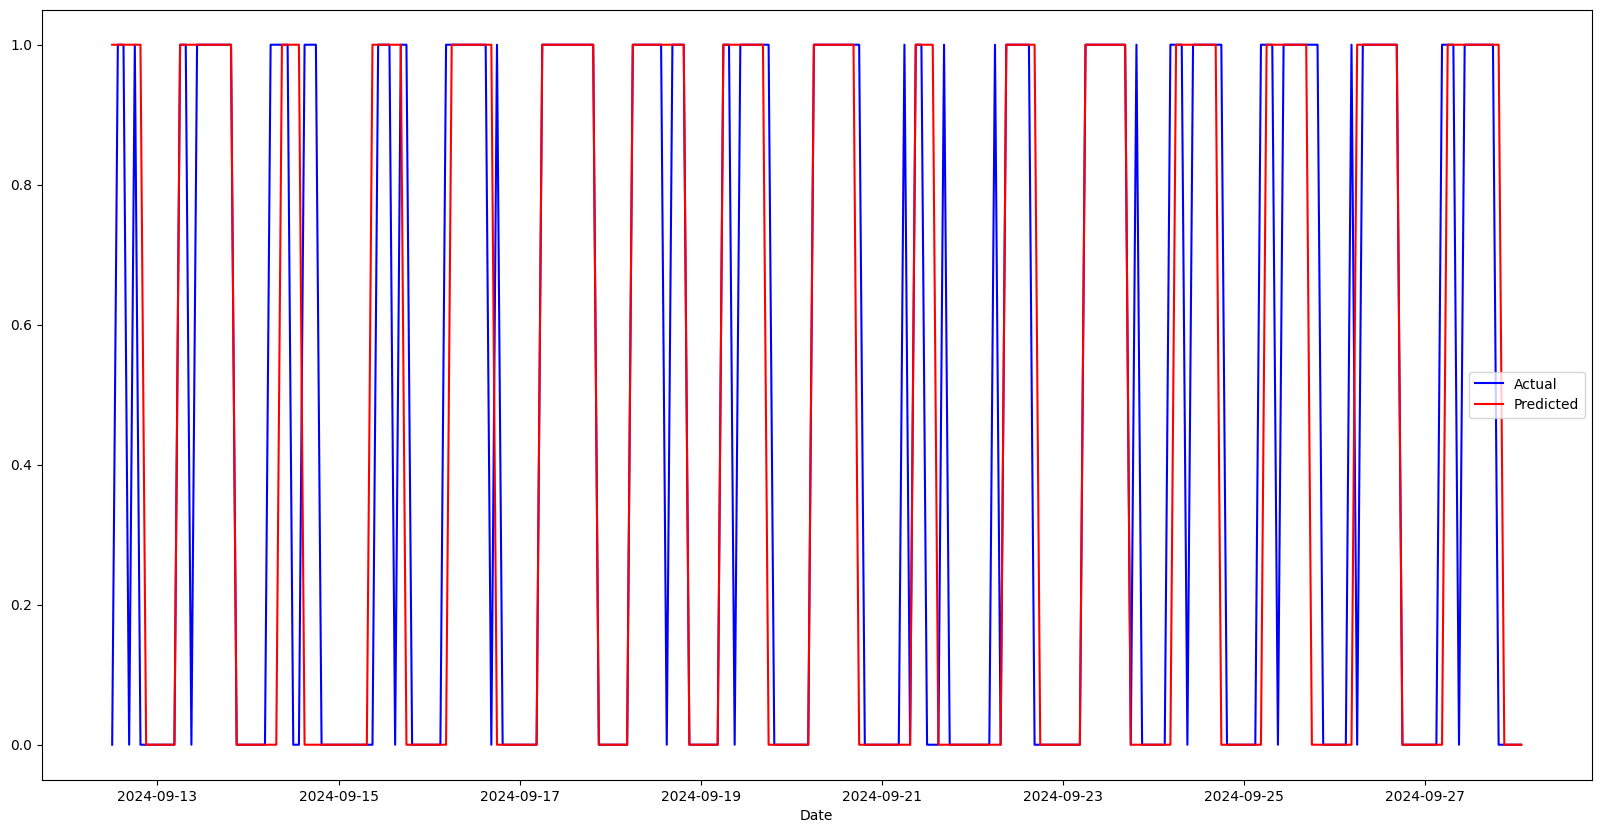

In [49]:
start = 0
end = 250

plt.figure(figsize=(20, 10))
plt.plot(total_arrival_1_5h.index[split_index+start:split_index+end], y_test[start:end], label='Actual', color='blue')
plt.plot(total_arrival_1_5h.index[split_index+start:split_index+end], y_pred[start:end], label='Predicted', color='red')
plt.xlabel('Date')

plt.legend()